## Download dataset

In [ ]:
from google.colab import files

files.upload(); # upload your kaggle.json file

Saving kaggle.json to kaggle.json


In [ ]:
import json

!mkdir /root/.kaggle/
!mv kaggle.json /root/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

mkdir: cannot create directory ‘/root/.kaggle/’: File exists
- path is now set to: {/content}


In [ ]:
dataset_name = 'playground-series-s3e23'
previous_dataset_path = '/content/{/content}/competitions/' + dataset_name
dataset_path = previous_dataset_path.replace('/{/content}', '')
dataset_archive = dataset_name + '.zip'

In [ ]:
!kaggle competitions download -c {dataset_name}

  0% 0.00/5.71M [00:00<?, ?B/s]
100% 5.71M/5.71M [00:00<00:00, 63.7MB/s]


In [ ]:
!mkdir -p competitions/playground-series-s3e23
!mv {previous_dataset_path}/{dataset_archive} {dataset_path}/{dataset_archive}
!unzip {dataset_path}/{dataset_archive} -d {dataset_path}

# Optional clean up
!rm -r '{'
!rm {dataset_path}/{dataset_archive}

Archive:  /content/competitions/playground-series-s3e23/playground-series-s3e23.zip
  inflating: /content/competitions/playground-series-s3e23/sample_submission.csv  
  inflating: /content/competitions/playground-series-s3e23/test.csv  
  inflating: /content/competitions/playground-series-s3e23/train.csv  


## Base line submission

In [ ]:
!kaggle competitions submit -c {dataset_name} -f {dataset_path}/sample_submission.csv -m "Sample submission test"

100% 729k/729k [00:00<00:00, 2.56MB/s]
400 - Bad Request - Submission not allowed:  Submissions have been disabled for this competition.


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [120]:
# Download the dataset
df = pd.read_csv('train.csv')

In [121]:
# The dataset contains data about 101763 code modules and it has 23 columns.
df.shape

(101763, 23)

In [122]:
df.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [123]:
#Remove the "id" column as we don't need it as a feature
df = df.drop('id', axis=1)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loc                101763 non-null  float64
 1   v(g)               101763 non-null  float64
 2   ev(g)              101763 non-null  float64
 3   iv(g)              101763 non-null  float64
 4   n                  101763 non-null  float64
 5   v                  101763 non-null  float64
 6   l                  101763 non-null  float64
 7   d                  101763 non-null  float64
 8   i                  101763 non-null  float64
 9   e                  101763 non-null  float64
 10  b                  101763 non-null  float64
 11  t                  101763 non-null  float64
 12  lOCode             101763 non-null  int64  
 13  lOComment          101763 non-null  int64  
 14  lOBlank            101763 non-null  int64  
 15  locCodeAndComment  101763 non-null  int64  
 16  un

In [125]:
## Check for missing values:
df.isna().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [126]:
#Check for duplicates
duplicate_rows = df[df.duplicated()]
duplicate_rows

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects


In [136]:
#Convert target column values from boolean to numerical - True -> 1 (yes defect), False -> 0 (no defect)
df['defects'] = df['defects'].astype(int)

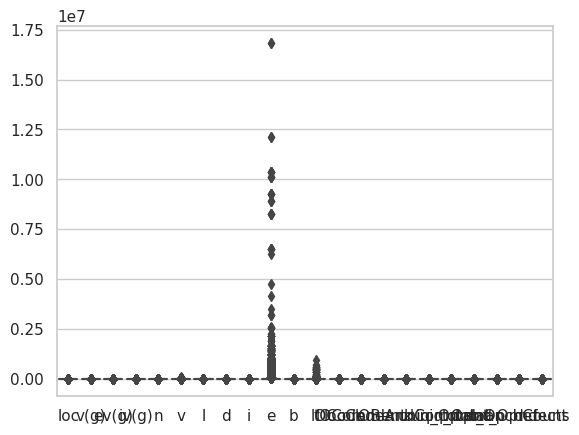

In [137]:
sns.boxplot(data=df)
plt.show()

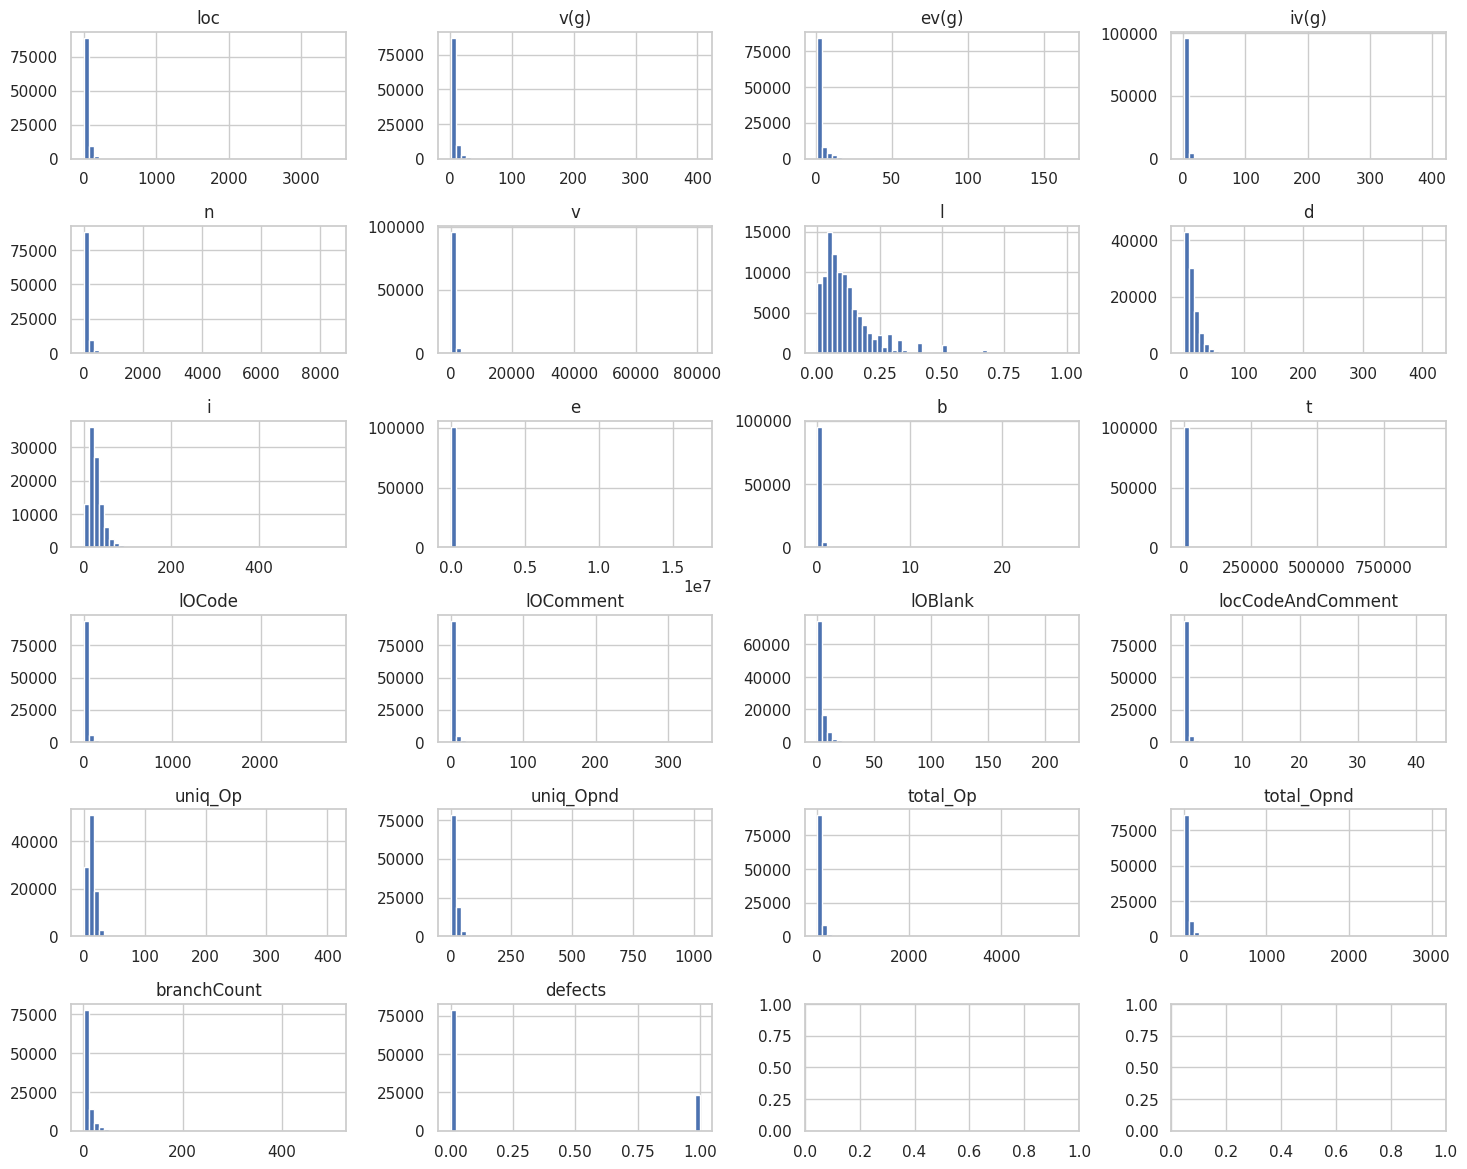

In [138]:
# Distribution plots for features
rows, cols = 6, 4
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
fig.tight_layout(pad=2.0)
axe = axes.ravel()

for i, feature in enumerate(df.columns):
    axe[i].set_title(feature)
    df[feature].hist(bins=50, ax=axe[i])

plt.show()

In [139]:
#Checking for class imbalance
class_counts = df['defects'].value_counts()
class_proportions = df['defects'].value_counts(normalize=True)
print("Class 0 count:", class_counts[0])
print("Class 1 count:", class_counts[1])

print("Class 0 proportion:", class_proportions[0])
print("Class 1 proportion:", class_proportions[1])



Class 0 count: 78699
Class 1 count: 23064
Class 0 proportion: 0.7733557383331859
Class 1 proportion: 0.22664426166681406


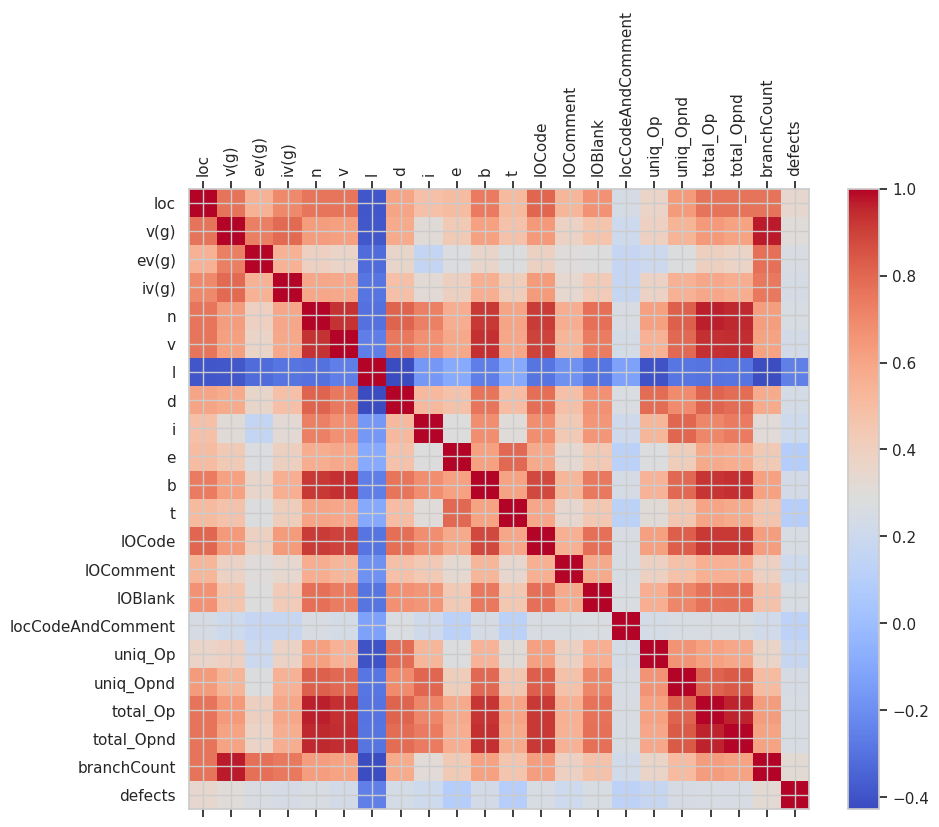

In [104]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

## Data Preprocessing

In [85]:
#Based on the maximum values of the columns in the dataset, we can conclude that the range of values for different features varies significantly.
#We need to scale the data.
df.max()

loc                      3442.00
v(g)                      404.00
ev(g)                     165.00
iv(g)                     402.00
n                        8441.00
v                       80843.08
l                           1.00
d                         418.20
i                         569.78
e                    16846621.12
b                          26.95
t                      935923.39
lOCode                   2824.00
lOComment                 344.00
lOBlank                   219.00
locCodeAndComment          43.00
uniq_Op                   410.00
uniq_Opnd                1026.00
total_Op                 5420.00
total_Opnd               3021.00
branchCount               503.00
defects                     1.00
dtype: float64